# Feuille de travaux pratiques. Résolution numérique d'équations non linéaires

In [1]:
# chargement des bibliothèques
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Exercice 1 (méthodes de dichotomie et de Newton-Raphson, d'après A. Quarteroni)

Dans cet exercice, on souhaite utiliser sur des exemples différentes méthodes d'approximation d'un zéro d'une fonction.

**1.** On considère tout d'abord la fonction
$$
f(x)=\frac{x}{2}-\sin(x)+\frac{\pi}{6}-\frac{\sqrt{3}}{2}
$$
sur l'intervalle $\left[-\frac{\pi}{2},\pi\right]$, en observant qu'elle y possède deux zéros.

**(a)** &Eacute;crire une fonction `f` prenant en entrée un réel $x$ et renvoyant la valeur de $f(x)$.

In [2]:
def f(x):
    return 0.5*x-np.sin(x)+np.pi/6-0.5*np.sqrt(3)

**(b)** À l'aide du graphe de la fonction $f$ sur $\left[-\frac{\pi}{2},\pi\right]$, expliquer pourquoi la [méthode de dichotomie](http://fr.wikipedia.org/wiki/M%C3%A9thode_de_dichotomie) ne peut être utilisée que pour approcher l'un des deux zéros de $f$, que l'on notera $\xi$ dans la suite.

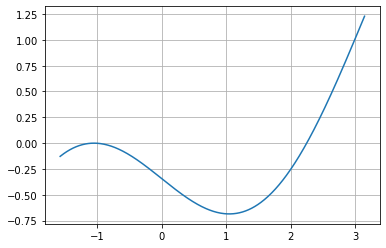

In [3]:
plt.grid()
x=np.linspace(-np.pi/2,np.pi,num=500)
plt.plot(x,f(x))

Le graphe montre l'existence de deux zéros réels pour la fonction $f$, l'un positif, l'autre négatif. La méthode de dichotomie ne permettant d'approcher que des zéros en lesquels la fonction change de signe, on constate que l'on ne peut utiliser cette méthode que pour déterminer l'un des deux zéros, noté $\xi$, qui se trouve compris entre 2 et 3 (on a en effet $f(2)f(3)<0$).

**(c)** Écrire une fonction `[zero,iter,res,inc]=dichotomie(f,a,b,tol,itermax)` mettant en &oelig;uvre la méthode de dichotomie pour l'approximation d'un zéro d'une fonction $f$ donnée, compris dans un intervalle $[a,b]$ tel que $f(a)f(b)<0$. En plus de la fonction et des bornes de l'intervalle, les autre paramètres d'entrée seront une tolérance `tol` pour le critère d'arrêt de la méthode et un nombre maximum `itermax` d'itérations à effectuer. Elle reverra en sortie l'approximation du zéro obtenue `zero`, le nombre d'itérations
nécessaire au calcul de cette approximation `iter`, la valeur `res` de la fonction $f$ en cette approximationt et un vecteur `inc` contenant la suite des valeurs absolues des différences entre deux approximations successives (dite suite des incréments). On réfléchira au choix du critère d'arrêt à employer.

On rappelle que la méthode de dichotomie pour l'approximation d'un zéro d'une fonction $f$ contenu dans un intervalle $[a,b]$ tel que $f(a)f(b)<0$ consiste, pour tout entier naturel $k$ et à partir des initialisations $a^{(0)}=a$ et $b^{(0)}=b$,

* à définir une approximation du zéro $x^{(k)}=\frac{a^{(k)}+b^{(k)}}{2}$,
* à poser $a^{(k+1)}=a^{(k)}$ et $b^{(k+1)}=x^{(k)}$ si $f(a^{(k)})f(x^{(k)})<0$, $a^{(k+1)}=x^{(k)}$ et $b^{(k+1)}=b^{(k)}$ si $f(x^{(k)})f(b^{(k)})<0$. 

In [4]:
def dichotomie(f,a,b,tol,itermax):
    fa,fb=f(a),f(b)
    if fa*fb>0:
        raise ValueError('Le signe de la fonction doit différer en chaque extrémité de l\'intervalle.')
    iter=1
    ak,bk=a,b
    xk=0.5*(ak+bk)
    res=f(xk)
    inc=[abs(bk-xk)]
    while (abs(res)>=tol and inc[-1]>=tol and iter<=itermax):
        iter=iter+1
        if res*fa>0:
            ak=xk
            fa=res
        elif res*fa<0:
            bk=xk
            fb=res
        else:
            return [xk,iter,res,inc]
        inc.append(0.5*inc[-1])
        xk=0.5*(ak+bk)
        res=f(xk)
    if iter>itermax:
        print('Le nombre maximum d\'itérations a été atteint sans convergence avec la tolérance désirée.')
    return [xk,iter,res,inc]

**(d)** Utiliser la fonction `dichotomie` pour calculer une approximation de $\xi$ avec une tolérance égale à $10^{-10}$ pour le critère d'arrêt à partir du choix d'un intervalle $[a,b]$ convenable.

In [5]:
[xi,iter,res,inc]=dichotomie(f,2.,3.,1e-10,1000)
print('Approximation de xi obtenue par la méthode de dichotomie :',xi)
print('Nombre d\'itérations nécessaires :',iter)

Approximation de xi obtenue par la méthode de dichotomie : 2.2460055893752724
Nombre d'itérations nécessaires : 32


**(e)** Au moyen de la commande `semilogy`, tracer le graphe de la suite des incréments $|x^{(k+1)}-x^{(k)}|$ en fonction de $k$ avec une échelle semilogarithmique et déterminer la loi selon laquelle ces quantités tendent vers $0$ quand $k$ tend vers l'infini.

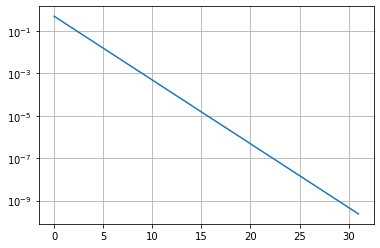

In [6]:
plt.grid()
plt.semilogy(inc)

On obtient une droite, ce qui implique que la quantité $|x^{(k+1)}−x^{(k)}|$ à l'étape $k$ vaut approximativement $C^k|x^{(1)}−x^{(0)}|$, où $C=10^p$ est une constante et l'exposant $p$ est égal à la pente de la droite. Calculons la valeur de cette pente et la constante $C$.

In [7]:
p=(np.log10(inc[iter-2])-np.log10(inc[0]))/(iter-2)
print('Pente de la droite :',p)
print('Valeur de la constante C :',pow(10,p))

Pente de la droite : -0.3010299956639812
Valeur de la constante C : 0.5


Comme on pouvait s'en douter, la loi suivie par les incréments est donc
$$
\forall k\in\mathbb{N},\ |x^{(k+1)}−x^{(k)}|=\frac{1}{2^k}|x^{(1)}−x^{(0)}|.
$$

**(f)** Écrire une fonction `[zero,iter,res,inc]=newton(f,df,x0,tol,itermax)` qui met en &oelig;uvre la [méthode de Newton-Raphson](http://fr.wikipedia.org/wiki/M%C3%A9thode_de_Newton) pour l'approximation d'un zéro d'une fonction dérivable $f$ donnée. Les paramètres d'entrée `df`, `x0`, `tol` et `itermax` représenteront respectivement la fonction correspondant à la fonction dérivée $f'$, l'initialisation de la suite des approximations, la tolérance pour le critère d'arrêt de la méthode et le nombre maximum d'itérations à effectuer. En sortie, les paramètres seront identiques à ceux de la fonction `dichotomie`. La encore, on réfléchira au choix du critère d'arrêt à employer.

On rappelle que la méthode de Newton-Raphson pour l'approximation d'un zéro d'une fonction $f$ dérivable consiste, à partir d'une initialisation $x^{(0)}$ donnéee, en la construction d'une suite d'approximations du zéro définie par la relation de récurrence
$$
\forall k\in\mathbb{N},\ x^{(k+1)}=x^{(k)}−\frac{f(x^{(k)})}{f'(x^{(k)})}.
$$

In [8]:
def newton(f,df,x0,tol,itermax):
    x=x0
    inc=[]
    iter=0
    diff=tol+1
    while (abs(diff)>=tol and iter<=itermax):
        iter=iter+1
        fx,dfx=f(x),df(x)
        diff=-fx/dfx
        x=x+diff
        inc.append(abs(diff))
    if iter>itermax:
        print('Le nombre maximum d\'itérations a été atteint sans convergence avec la tolérance désirée.')
    return [x,iter,f(x),inc]

**(g)** Calculer des approximations des deux zéros $\xi$ et $\zeta$ de la fonction $f$ avec la méthode de Newton-Raphson, en prenant une tolérance égale à $10^{-10}$ pour le critère d'arrêt et comme initialisations le point $\pi$ pour $\xi$ et $-\frac{\pi}{2}$ pour $\zeta$. Comparer les nombres d'itérations effectuées pour obtenir une approximation de chacun des zéros. Pourquoi sont-ils très différents ? Comparer également les graphes des suites des incréments obtenus avec la commande `semilogy`.

In [9]:
def df(x):
    return 0.5-np.cos(x)

[xi,iter_xi,res,inc_xi]=newton(f,df,np.pi,1e-10,1000)
print('Approximation de xi obtenue par la méthode de Newton-Raphson :',xi)
print('Nombre d\'itérations nécessaires :',iter_xi)
[zeta,iter_zeta,res,inc_zeta]=newton(f,df,-0.5*np.pi,1e-10,1000)
print('Approximation de zeta obtenue par la méthode de Newton-Raphson :',zeta)
print('Nombre d\'itérations nécessaires :',iter_zeta)

Approximation de xi obtenue par la méthode de Newton-Raphson : 2.2460055892979742
Nombre d'itérations nécessaires : 5
Approximation de zeta obtenue par la méthode de Newton-Raphson : -1.0471975514275533
Nombre d'itérations nécessaires : 28


La différence entre le nombre d'itérations nécessaires pour l'obtention de chaque zéro s'explique par le fait que $f'(\zeta)=0$ (on dit que ce zéro est de multiplicité double), la méthode de Newton-Raphson ne converge donc que linéairement vers ce zéro, ce que l'on conrfime en traçant les graphes des suites des incréments calculées pour chacune des approximations.

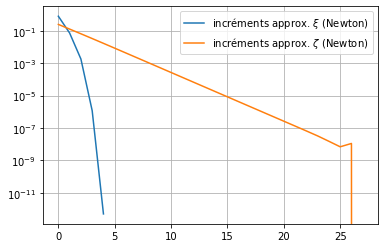

In [10]:
plt.grid()
plt.semilogy(inc_xi,label='incréments approx. $\\xi$ (Newton)')
plt.semilogy(inc_zeta,label='incréments approx. $\\zeta$ (Newton)')
plt.legend() 

**(h)** On cherche à réduire le nombre d'itérations nécessaires à l'obtention d'une approximation du zéro négatif $\zeta$ de la fonction $f$. La méthode de Newton-Raphson modifiée, basée sur la modification suivante de la relation de récurrence de la méthode de Newton-Raphson
$$
\forall k\in\mathbb{N},\ x^{(k+1)}=x^{(k)}−2\frac{f(x^{(k)})}{f'(x^{(k)})},
$$
a une convergence quadratique si $f'(\zeta)=0$. Mettre en &oelig;uvre cette méthode dans une fonction `modnewton` et voir combien d'itérations sont nécessaires pour qu'elle fournisse une approximation de $\zeta$ avec une tolérance égale à $10^{-10}$ pour le critère d'arrêt.

On modifie le code de la fonction `newton` précédemment écrite pour tenir compte de la multiplicité du zéro approché.

In [11]:
def modnewton(f,df,m,x0,tol,itermax):
    x=x0
    inc=[]
    iter=0
    diff=tol+1
    while (abs(diff)>=tol and iter<=itermax):
        iter=iter+1
        fx,dfx=f(x),df(x)
        diff=-m*fx/dfx
        x=x+diff
        inc.append(abs(diff))
    if iter>itermax:
        print('Le nombre maximum d\'itérations a été atteint sans convergence avec la tolérance désirée.')
    return [x,iter,f(x),inc]

On utilise cette nouvelle fonction pour approcher $\zeta$.

Approximation de zeta obtenue par la méthode de Newton-Raphson modifiée : -1.0471975512130902
Nombre d'itérations nécessaires : 4


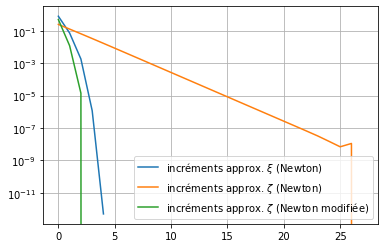

In [12]:
[zeta,iter,res,inc]=modnewton(f,df,2,-0.5*np.pi,1e-10,1000)
print('Approximation de zeta obtenue par la méthode de Newton-Raphson modifiée :',zeta)
print('Nombre d\'itérations nécessaires :',iter)
plt.grid()
plt.semilogy(inc_xi,label='incréments approx. $\\xi$ (Newton)')
plt.semilogy(inc_zeta,label='incréments approx. $\\zeta$ (Newton)')
plt.semilogy(inc,label='incréments approx. $\\zeta$ (Newton modifiée)')
plt.legend() 

**2.** On considère à présent la fonction $g(x)=x+e^{-20\,x^2}\cos(x)$, dont on veut approcher les zéros par la méthode de Newton-Raphson.

**(a)** &Eacute;crire une fonction `g` pour la fonction $g$ et une fonction `dg` pour sa dérivée $g'$.

In [13]:
def g(x):
    return x+np.exp(-20*pow(x,2))*np.cos(x)

def dg(x):
    return 1-(40*x*np.cos(x)+np.sin(x))*np.exp(-20*pow(x,2))

**(b)** Utiliser la fonction `newton` pour essayer d'approcher d'un zéro de $g$ en prenant $x^{(0)}=0$ pour initialisation et une tolérance égale à $10^{-10}$ pour le critère d'arrêt.

In [14]:
[zero,iter,res,inc]=newton(g,dg,0,1e-10,1000)

Le nombre maximum d'itérations a été atteint sans convergence avec la tolérance désirée.


On constate que la méthode de Newton-Raphson n'a pas convergé après mille itérations.

**(c)** Tracer le graphe de $g$ sur l'intervalle $[-1,1]$ et tenter de donner une explication qualitative du fait la méthode de Newton-Raphson ne converge pas avec l'initialisation précédente.

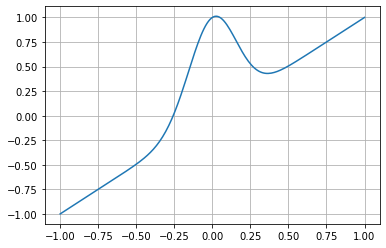

In [15]:
plt.grid()
x=np.linspace(-1,1,200)
plt.plot(x,g(x))

On explique l'absence de convergence de la méthode par que le fait la fonction $g$ prend en $x=0$ et $x=−1$ des valeurs opposées, alors que sa dérivée $g'$ prend en ces points des valeurs pratiquement égales. La suite produite à partir du choix $x^{(0)}=0$ est alors périodique.

**(d)** Appliquer cinq intérations de la méthode de dichotomie à la fonction $g$ sur l'intervalle $[-1,1]$ et utiliser le point obtenu comme initialisation de la méthode de Newton-Raphson pour la recherche d'un zéro de $g$.

In [16]:
[x0,iter,res,inc]=dichotomie(g,-1.,1.,1e-10,5)
print('Initialisation obtenue par la méthode de dichotomie :',x0)
[zero,iter,res,inc]=newton(g,dg,x0,1e-10,1000)
print('Approximation du zéro de de g obtenue par la méthode de Newton-Raphson :',zero)
print('Nombre d\'itérations nécessaires :',iter)

Le nombre maximum d'itérations a été atteint sans convergence avec la tolérance désirée.
Initialisation obtenue par la méthode de dichotomie : -0.28125
Approximation du zéro de de g obtenue par la méthode de Newton-Raphson : -2.5729815080399304e-01
Nombre d'itérations nécessaires : 4


**3.** Modifier la fonction `dichotomie` pour obtenir une fonction
`regulafalsi` mettant en &oelig;uvre la [méthode de la fausse position](http://fr.wikipedia.org/wiki/M%C3%A9thode_de_la_fausse_position). De la même manière,
modifier la fonction `newton` pour obtenir une fonction `secante` mettant en &oelig;uvre la [méthode de la sécante](http://fr.wikipedia.org/wiki/M%C3%A9thode_de_la_s%C3%A9cante).

La méthode de la fausse position diffère de la méthode de dichotomie par le choix à chaque étape du point $x^{(k)}$, qui n'est plus le milieu de l'intervalle d'encadrement courant $[a^{(k)},b^{(k)}]$, mais le point d'intersection entre l'axe des abscisses et la droite passant par les points $(a^{(k)},f(a^{(k)}))$ et $(b^{(k)},f(b^{(k)}))$,
$$
x^{(k)}=a^{(k)}−\frac{a^{(k)}−b^{(k)}}{f(a^{(k)})−f(b^{(k)})}f(a^{(k)}).
$$
On modifie donc facilement la fonction `dichotomie` pour programmer la méthode.

In [17]:
def regulafalsi(f,a,b,tol,itermax):
    fa,fb=f(a),f(b)
    if fa*fb>0:
        raise ValueError('Le signe de la fonction doit différer en chaque extrémité de l\'intervalle.')
    iter=1
    ak,bk=a,b
    xk=(bk*fa-ak*fb)/(fa-fb)
    inc=[abs(bk-xk)]
    res=f(xk)
    while (abs(res)>=tol and inc[-1]>=tol and iter<=itermax):
        iter=iter+1
        if res*fa>0:
            inc.append(abs(ak-xk))
            ak=xk
            fa=res
        elif res*fa<0:
            inc.append(abs(bk-xk))
            bk=xk
            fb=res
        else:
            return [xk,iter,res,inc]
        xk=(bk*fa-ak*fb)/(fa-fb)
        res=f(xk)
    if iter>itermax:
        print('Le nombre maximum d\'itérations a été atteint sans convergence avec la tolérance désirée.')
    return [xk,iter,res,inc]

On teste cette nouvelle fonction.

In [18]:
def f(x):
    return 0.5*x-np.sin(x)+np.pi/6-0.5*np.sqrt(3)
[xi,iter,res,inc]=regulafalsi(f,2,3,1e-10,1000)
print('Approximation de xi obtenue par la méthode de la fausse position :',xi)
print('Nombre d\'itérations nécessaires :',iter)

Approximation de xi obtenue par la méthode de la fausse position : 2.2460055892772504
Nombre d'itérations nécessaires : 13


On rappelle que la méthode de la sécante est définie par la relation de récurrence
$$
\forall k\in\mathbb{N},\ x^{(k+1)}=x^{(k)}−\frac{x^{(k)}−x^{(k-1)}}{f(x^{(k)})−f(x^{(k-1)})}f(x^{(k)}),
$$
et nécessite par conséquent deux valeurs d'initialisation $x^{(0)}$ et $x^{(−1)}$.

In [19]:
def secante(f,x0,xm1,tol,itermax):
    if (x0==xm1):
        raise ValueError('Les deux initialisations données doivent être distinctes.')
    fxm1,fx0=f(xm1),f(x0)
    inc=[]
    iter=0
    diff=tol+1
    while (abs(diff)>=tol and iter<=itermax):
        iter=iter+1
        diff=-fx0*(x0-xm1)/(fx0-fxm1)
        xm1=x0
        fxm1=fx0
        x0=x0+diff
        fx0=f(x0)
        inc.append(abs(diff))
    if iter>itermax:
        print('Le nombre maximum d\'itérations a été atteint sans convergence avec la tolérance désirée.')
    return [x0,iter,fx0,inc]

On teste cette dernière fonction.

In [20]:
[xi,iter,res,inc]=secante(f,np.pi,np.pi-0.5,1e-10,1000)
print('Approximation de xi obtenue par la méthode de la sécante :',xi)
print('Nombre d\'itérations nécessaires :',iter)

Approximation de xi obtenue par la méthode de la sécante : 2.2460055892979742
Nombre d'itérations nécessaires : 6


## Exercice bonus (variantes de la méthode de la fausse position)

Le phénomène de rétention d'une des bornes d'encadrement observé lors de l'application de la méthode de la fausse position à la résolution numérique d'une équation non linéaire dans $\mathbb{R}$ a pour effet de diminuer sa vitesse de convergence, ce qui la rend parfois moins efficace que la méthode de dichotomie. Pour corriger ce défaut, plusieurs variantes ont été introduites. On propose dans cet exercice de les tester sur quelques exemples.

Pour décrire de manière explicite ces modifications, on adopte les notations suivantes. On suppose disposer initialement d'un intervalle $[x^{(0)},x^{(1)}]$ non vide de $\mathbb{R}$ et d'une application continue $f$ de $[x^{(0)},x^{(1)}]$ dans $\mathbb{R}$, telle que $f(x^{(0)})f(x^{(1)})<0$, ce qui assure l'existence d'un zéro $\xi$ de $f$. On pose alors $y^{(0)}=f(x^{(0)})$ et $y^{(1)}=f(x^{(1)})$. À l'étape $k$, avec $k$ un entier naturel non nul, on pose
$$
x^{(k+1)}=\frac{x^{(k-1)}y^{(k)}-x^{(k)}y^{(k-1)}}{y^{(k)}-y^{(k-1)}}\text{ et }y^{(k+1)}=f(x^{(k+1)}).
$$
Si $y^{(k+1)}y^{(k)}<0$, on passe à l'étape suivante. En revanche, si $y^{(k+1)}y^{(k)}>0$, on fait la mise à jour suivante
$$
x^{(k)}=x^{(k-1)}\text{ et }y^{(k)}=\alpha\,y^{(k-1)}
$$
avant de passer à l'étape suivante, avec
* $\alpha=\frac{1}{2}$ pour la <a href="https://doi.org/10.1007/BF01934364">méthode Illinois</a>,
* $\alpha=\frac{y^{(k)}}{y^{(k)}+y^{(k+1)}}$ pour la <a href="https://doi.org/10.1007/BF01932959">méthode Pegasus</a>,
* $\alpha=\frac{y^{(k)}-y^{(k+1)}}{y^{(k)}}$ si cette quantité est strictement positive, $\alpha=\frac{1}{2}$ sinon, pour la <a href="https://doi.org/10.1007/BF01951936">méthode d'Anderson-Björck</a>.

**1.** Sur le modèle de la fonction `regulafalsi` écrite dans l'exercice précédent, écrire des fonctions mettant en &oelig;uvre chacune des variantes données ci-dessus.

In [21]:
def illinois(f,a,b,tol,itermax):
    fa,fb=f(a),f(b)
    if fa*fb>0:
        raise ValueError('Le signe de la fonction doit différer en chaque extrémité de l\'intervalle.')
    iter=1
    ak,bk=a,b
    xk=(bk*fa-ak*fb)/(fa-fb)
    inc=[abs(bk-xk)]
    res=f(xk)
    while (abs(res)>=tol and inc[-1]>=tol and iter<=itermax):
        iter=iter+1
        if res*fb>0:
            fa=0.5*fa
        elif res*fb<0:
            ak=bk
            fa=fb
        else:
            return [xk,iter,res,inc]
        inc.append(abs(bk-xk))
        bk=xk
        fb=res
        xk=(bk*fa-ak*fb)/(fa-fb)
        res=f(xk)
    if iter>itermax:
        print('Le nombre maximum d\'itérations a été atteint sans convergence avec la tolérance désirée.')
    return [xk,iter,res,inc]

def pegasus(f,a,b,tol,itermax):
    fa,fb=f(a),f(b)
    if fa*fb>0:
        raise ValueError('Le signe de la fonction doit différer en chaque extrémité de l\'intervalle.')
    iter=1
    ak,bk=a,b
    xk=(bk*fa-ak*fb)/(fa-fb)
    inc=[abs(bk-xk)]
    res=f(xk)
    while (abs(res)>=tol and inc[-1]>=tol and iter<=itermax):
        iter=iter+1
        if res*fb>0:
            fa=fa*fb/(fb+res)
        elif res*fb<0:
            ak=bk
            fa=fb
        else:
            return [xk,iter,res,inc]
        inc.append(abs(bk-xk))
        bk=xk
        fb=res
        xk=(bk*fa-ak*fb)/(fa-fb)
        res=f(xk)
    if iter>itermax:
        print('Le nombre maximum d\'itérations a été atteint sans convergence avec la tolérance désirée.')
    return [xk,iter,res,inc]

def anderson_bjorck(f,a,b,tol,itermax):
    fa,fb=f(a),f(b)
    if fa*fb>0:
        raise ValueError('Le signe de la fonction doit différer en chaque extrémité de l\'intervalle.')
    iter=1
    ak,bk=a,b
    xk=(bk*fa-ak*fb)/(fa-fb)
    inc=[abs(bk-xk)]
    res=f(xk)
    while (abs(res)>=tol and inc[-1]>=tol and iter<=itermax):
        iter=iter+1
        if res*fb>0:
            reduction_factor=(fb-res)/fb
            if reduction_factor>0:
                fa=reduction_factor*fa
            else:
                fa=0.5*fa
        elif res*fb<0:
            ak=bk
            fa=fb
        else:
            return [xk,iter,res,inc]
        inc.append(abs(bk-xk))
        bk=xk
        fb=res
        xk=(bk*fa-ak*fb)/(fa-fb)
        res=f(xk)
    if iter>itermax:
        print('Le nombre maximum d\'itérations a été atteint sans convergence avec la tolérance désirée.')
    return [xk,iter,res,inc]

**1.** Tester ces fonctions, ainsi que les fonctions `dichotomie` et `regulafalsi`, pour la détermination du zéro de la fonction $f(x)=11x^{11}-1$. On utilisera l'intervalle $\left[\frac{1}{10},1\right]$ comme encadrement initial et une tolérance égale à $10^{-12}$.

In [22]:
def f(x):
    return 11*pow(x,11)-1.

[xi,iter,res,inc]=dichotomie(f,0.1,1.,1e-12,100)
print('Approximation de xi obtenue par la méthode de dichotomie :',xi)
print('Nombre d\'itérations nécessaires :',iter)
[xi,iter,res,inc]=regulafalsi(f,0.1,1.,1e-12,100)
print('Approximation de xi obtenue par la méthode de la fausse position :',xi)
print('Nombre d\'itérations nécessaires :',iter)
[xi,iter,res,inc]=illinois(f,0.1,1.,1e-12,100)
print('Approximation de xi obtenue par la méthode Illinois :',xi)
print('Nombre d\'itérations nécessaires :',iter)
[xi,iter,res,inc]=pegasus(f,0.1,1.,1e-12,100)
print('Approximation de xi obtenue par la méthode Pegasus :',xi)
print('Nombre d\'itérations nécessaires :',iter)
[xi,iter,res,inc]=anderson_bjorck(f,0.1,1.,1e-12,100)
print('Approximation de xi obtenue par la méthode d\'Anderson-Björck :',xi)
print('Nombre d\'itérations nécessaires :',iter)

Approximation de xi obtenue par la méthode de dichotomie : 0.8041330975033818
Nombre d'itérations nécessaires : 40
Approximation de xi obtenue par la méthode de la fausse position : 0.8041330975021453
Nombre d'itérations nécessaires : 93
Approximation de xi obtenue par la méthode Illinois : 0.8041330975036642
Nombre d'itérations nécessaires : 14
Approximation de xi obtenue par la méthode Pegasus : 0.8041330975036645
Nombre d'itérations nécessaires : 13
Approximation de xi obtenue par la méthode d'Anderson-Björck : 0.8041330975036644
Nombre d'itérations nécessaires : 21


**2.** Reprendre la question précédente avec la fonction $f(x)=1-\frac{1}{x^5}$. On utilisera l'intervalle $\left[\frac{1}{2},2\right]$ comme encadrement initial et une tolérance égale à $10^{-12}$.

In [23]:
def f(x):
    return 1.-1./pow(x,5)

[xi,iter,res,inc]=dichotomie(f,.5,2.,1e-12,1000)
print('Approximation de xi obtenue par la méthode de dichotomie :',xi)
print('Nombre d\'itérations nécessaires :',iter)
[xi,iter,res,inc]=regulafalsi(f,.5,2.,1e-12,1000)
print('Approximation de xi obtenue par la méthode de la fausse position :',xi)
print('Nombre d\'itérations nécessaires :',iter)
[xi,iter,res,inc]=illinois(f,.5,2.,1e-12,100)
print('Approximation de xi obtenue par la méthode Illinois :',xi)
print('Nombre d\'itérations nécessaires :',iter)
[xi,iter,res,inc]=pegasus(f,.5,2.,1e-12,100)
print('Approximation de xi obtenue par la méthode Pegasus :',xi)
print('Nombre d\'itérations nécessaires :',iter)
[xi,iter,res,inc]=anderson_bjorck(f,.5,2.,1e-12,100)
print('Approximation de xi obtenue par la méthode d\'Anderson-Björck :',xi)
print('Nombre d\'itérations nécessaires :',iter)

Approximation de xi obtenue par la méthode de dichotomie : 1.0000000000002274
Nombre d'itérations nécessaires : 41
Approximation de xi obtenue par la méthode de la fausse position : 1.0000000000104112
Nombre d'itérations nécessaires : 313
Approximation de xi obtenue par la méthode Illinois : 1.0
Nombre d'itérations nécessaires : 14
Approximation de xi obtenue par la méthode Pegasus : 1.0
Nombre d'itérations nécessaires : 12
Approximation de xi obtenue par la méthode d'Anderson-Björck : 1.0
Nombre d'itérations nécessaires : 13


**3.** Reprendre la question précédente avec la fonction $f(x)=1-\frac{1}{x}$. On utilisera l'intervalle $\left[\frac{1}{2},2\right]$ comme encadrement initial et une tolérance égale à $10^{-12}$.

In [24]:
def f(x):
    return 1.-1./x

[xi,iter,res,inc]=dichotomie(f,.5,2.,1e-12,1000)
print('Approximation de xi obtenue par la méthode de dichotomie :',xi)
print('Nombre d\'itérations nécessaires :',iter)
[xi,iter,res,inc]=regulafalsi(f,.5,2.,1e-12,1000)
print('Approximation de xi obtenue par la méthode de la fausse position :',xi)
print('Nombre d\'itérations nécessaires :',iter)
[xi,iter,res,inc]=illinois(f,.5,2.,1e-12,100)
print('Approximation de xi obtenue par la méthode Illinois :',xi)
print('Nombre d\'itérations nécessaires :',iter)
[xi,iter,res,inc]=pegasus(f,.5,2.,1e-12,100)
print('Approximation de xi obtenue par la méthode Pegasus :',xi)
print('Nombre d\'itérations nécessaires :',iter)
[xi,iter,res,inc]=anderson_bjorck(f,.5,2.,1e-12,100)
print('Approximation de xi obtenue par la méthode d\'Anderson-Björck :',xi)
print('Nombre d\'itérations nécessaires :',iter)

Approximation de xi obtenue par la méthode de dichotomie : 1.0000000000009095
Nombre d'itérations nécessaires : 39
Approximation de xi obtenue par la méthode de la fausse position : 1.0000000000009097
Nombre d'itérations nécessaires : 40
Approximation de xi obtenue par la méthode Illinois : 1.0
Nombre d'itérations nécessaires : 10
Approximation de xi obtenue par la méthode Pegasus : 1.0000000000000009
Nombre d'itérations nécessaires : 6
Approximation de xi obtenue par la méthode d'Anderson-Björck : 0.9999999999999998
Nombre d'itérations nécessaires : 2


## Exercice 2 (calcul de $\sqrt{2}$)
Dans cet exercice, on cherche à calculer une approximation de $\sqrt{2}$ de diverses façons.

**1.** On peut tout d'abord obtenir une valeur approchée de $\sqrt{2}$ en cherchant la racine positive de la fonction polynomiale $f(x)=x^2-2$. Pour cela, appliquer successivement à $f$ les méthodes de dichotomie et de de la fausse position sur l'intervalle $[1,2]$, de Newton-Raphson et de la sécante.

In [25]:
def f(x):
    return pow(x,2)-2.

[zero,iter,res,inc]=dichotomie(f,1,2,1e-10,1000)
print('Approximation de la racine carrée de 2 obtenue par la méthode de dichotomie :',zero)
print('Nombre d\'itérations nécessaires :',iter)
print('Erreur absolue avec la valeur fournie par sqrt(2) :',abs(zero-np.sqrt(2.)))

[zero,iter,res,inc]=regulafalsi(f,1,2,1e-10,1000)
print('Approximation de la racine carrée de 2 obtenue par la méthode de la fausse position :',zero)
print('Nombre d\'itérations nécessaires :',iter)
print('Erreur absolue avec la valeur fournie par sqrt(2) :',abs(zero-np.sqrt(2.)))

Approximation de la racine carrée de 2 obtenue par la méthode de dichotomie : 1.4142135623842478
Nombre d'itérations nécessaires : 29
Erreur absolue avec la valeur fournie par sqrt(2) : 1.1152634371569548e-11
Approximation de la racine carrée de 2 obtenue par la méthode de la fausse position : 1.4142135623637997
Nombre d'itérations nécessaires : 14
Erreur absolue avec la valeur fournie par sqrt(2) : 9.295453295976586e-12


On initialise la méthode de Newton-Raphson avec le point milieu de l'intervalle $[1,2]$ et la méthode de la sécante avec les bornes $1$ et $2$.

In [26]:
def df(x):
    return 2.*x

[zero,iter,res,inc]=newton(f,df,1.5,1e-10,1000)
print('Approximation de la racine carrée de 2 obtenue par la méthode de Newton-Raphson :',zero)
print('Nombre d\'itérations nécessaires :',iter)
print('Erreur absolue avec la valeur fournie par sqrt(2) :',abs(zero-np.sqrt(2.)))

[zero,iter,res,inc]=secante(f,1,2,1e-10,1000)
print('Approximation de la racine carrée de 2 obtenue par la méthode de la sécante :',zero)
print('Nombre d\'itérations nécessaires :',iter)
print('Erreur absolue avec la valeur fournie par sqrt(2) :',abs(zero-np.sqrt(2.)))

Approximation de la racine carrée de 2 obtenue par la méthode de Newton-Raphson : 1.4142135623730951
Nombre d'itérations nécessaires : 4
Erreur absolue avec la valeur fournie par sqrt(2) : 0.0
Approximation de la racine carrée de 2 obtenue par la méthode de la sécante : 1.414213562373095
Nombre d'itérations nécessaires : 7
Erreur absolue avec la valeur fournie par sqrt(2) : 2.220446049250313e-16


**2.** On peut également se servir de méthodes de point fixe, définies à partir des applications suivantes
$$
g_1(x)=2+x-x^2,\ g_2(x)=\frac{2}{x}\text{ et }g_3(x)=\frac{x+2}{x+1},
$$
considérées sur l'intervalle $[1,2]$.

**(a)** Parmi les trois fonctions ci-dessus, lesquelles conduisent à une méthode de point fixe convergente ?

D'après un résultat du cours, on a convergence d'une méthode de point fixe associée à une fonction $g$, définie sur un intervalle $[a,b]$ et à valeurs dans ce même intervalle, s'il existe une constante $0<K<1$ telle que, pour tout $x$ dans $[a,b]$, $|g'(x)|\leq K$ (la fonction $g$ étant alors dite _contractante_). Traçons les graphes des trois fonctions proposées et des valeurs absolues de leurs dérivées sur l'intervalle $[1,2]$.

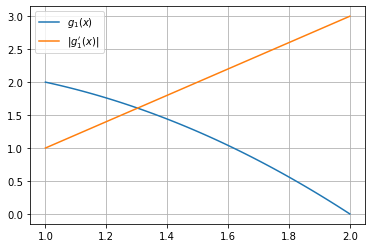

In [27]:
x=np.linspace(1,2,100)

def g1(x):
    return 2.+x-pow(x,2)

def dg1(x):
    return 1.-2*x

plt.grid()
plt.plot(x,g1(x),label='$g_1(x)$')
plt.plot(x,abs(dg1(x)),label='$|g_1\'(x)|$')
plt.legend()

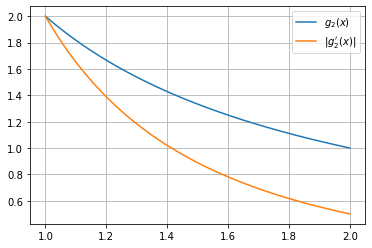

In [28]:
def g2(x):
    return 2./x

def dg2(x):
    return -2./pow(x,2)

plt.grid()
plt.plot(x,g2(x),label='$g_2(x)$')
plt.plot(x,abs(dg2(x)),label='$|g_2\'(x)|$')
plt.legend()

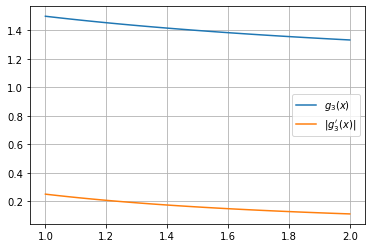

In [29]:
def g3(x):
    return (x+2.)/(x+1.)

def dg3(x):
    return -pow(x+1.,-2)

plt.grid()
plt.plot(x,g3(x),label='$g_3(x)$')
plt.plot(x,abs(dg3(x)),label='$|g_3\'(x)|$')
plt.legend()

On déduit de ces graphes que seule la fonction $g_3$ verifie les hypothèses requises.

**(b)** Vérifier cette affirmation en calculant les vingt premiers termes des suites définies par les relations de récurrence
$$
x^{(0)}=\frac{1}{2}\text{ et },\forall k\in\mathbb{N},\ x^{(k+1)}=g_i(x^{(k)}),\ i\in\{1,2,3\}.
$$

In [30]:
n=20

x1,x2,x3=[0]*n,[0]*n,[0]*n

x1[0],x2[0],x3[0]=0.5,0.5,0.5

for i in range(n-1):
    x1[i+1],x2[i+1],x3[i+1]=g1(x1[i]),g2(x2[i]),g3(x3[i])

print('Termes de la suite construite avec g_1 :',x1)
print('Termes de la suite construite avec g_2 :',x2)
print('Termes de la suite construite avec g_3 :',x3)

Termes de la suite construite avec g_1 : [0.5, 2.25, -0.8125, 0.52734375, 2.2492523193359375, -0.8098836767021567, 0.5342047535092399, 2.248830034837372, -0.8084064907492836, 0.5380724549651448, 2.248550488172927, -0.8074288096897808, 0.5406299075931629, 2.248349210608971, -0.806724962237011, 0.5424698730666823, 2.2481963098817, -0.8061903378839927, 0.5438668012185008, 2.2480757037508567]
Termes de la suite construite avec g_2 : [0.5, 4.0, 0.5, 4.0, 0.5, 4.0, 0.5, 4.0, 0.5, 4.0, 0.5, 4.0, 0.5, 4.0, 0.5, 4.0, 0.5, 4.0, 0.5, 4.0]
Termes de la suite construite avec g_3 : [0.5, 1.6666666666666667, 1.375, 1.4210526315789473, 1.4130434782608696, 1.4144144144144144, 1.414179104477612, 1.4142194744976815, 1.414212548015365, 1.4142137364094405, 1.414213532513181, 1.4142135674962464, 1.4142135614941012, 1.4142135625239065, 1.4142135623472198, 1.4142135623775345, 1.4142135623723333, 1.4142135623732257, 1.4142135623730727, 1.414213562373099]


## Exercice 3 (bassins de convergence de la méthode de Newton-Raphson)

On s'intéresse à la recherche des solutions complexes de l'équation $z^3=1$ par la méthode de Newton-Raphson. On considère pour cela la fonction d'une variable complexe $f(z)=z^3-1$, qui s'annule en chaque point $z$ du plan complexe tel que $z^3=1$.

**1.** &Eacute;crire deux fonctions `f` et `df` renvoyant respectivement les valeurs de $f(z)$ et de $f'(z)$ en un point quelconque $z$ de $\mathbb{C}$.

In [ ]:
def f(x):
    return pow(x,3)-1.

def df(x):
    return 3.*pow(x,2)

**2.** Pour tout entier naturel $n$ supérieur ou égal à $2$, on définit une grille de pas $h=\frac{3}{n-1}$ couvrant le carré $[-1,5,1,5]\times[-1,5\mathrm{i},1,5\mathrm{i}]$.

&Eacute;crire un programme résolvant, pour une valeur donnée de $n$, l'équation $f(z)=0$ avec une tolérance égale à $10^{-4}$ par la méthode de Newton-Raphson utilisant successivement chaque point de la grille $z_{ij}=-1,5(1+\mathrm{i})+(i+\mathrm{i}j)h$, $0\leq i,j\leq n$ comme initialisation. Pour chaque couple $(i,j)$, stocker dans le tableau à deux dimensions `nrac` le numéro $k$ ($k=0$, $1$ ou $2$) de la racine cubique complexe de l'unité $e^{\mathrm{i}\frac{2k\pi}{3}}$ vers laquelle la méthode aura convergée à partir de $z_{ij}$ (on posera $k=3$ lorsque la méthode n'a pas convergé après $100$ itérations) et dans le tableau `niter` le nombre d'itérations nécessaires pour atteindre la convergence (en stockant le nombre maximal d'itérations autorisées en l'absence de convergence).

Pour automatiser le processus de reconnaissance de la racine approchée par la valeur `zero` renvoyée, on pourra utiliser les instructions suivantes (ci-dessous, `racines` désigne un tableau contenant les trois racines cubiques complexes de l'unité et `tol` est la tolérance du critère d'arrêt de la méthode de Newton-Raphson) :

`d=racines-[zero,zero,zero]
 m,k=min(abs(d)),argmin(abs(d))
 if (abs(m)>tol):
     k=3`
     
Lancer le programme avec $n$ valant $100$ et une tolérance fixée à $10^{-4}$ (compte tenu du nombre important d'appels de la méthode de Newton--Raphson).

In [ ]:
racines=np.cos(2*np.pi*np.arange(3)/3)+1j*np.sin(2*np.pi*np.arange(3)/3)

n=100
tol=1e-4

x=np.linspace(-1.5,1.5,n+1)
niter,nrac=np.zeros((n+1,n+1)),np.zeros((n+1,n+1))
for i in range(n+1):
    for j in range(n+1):
        [zero,iter,res,inc]=newton(f,df,x[i]+1j*x[j],tol,100)
        niter[i,j]=iter
        d=racines-[zero,zero,zero]
        m,k=min(abs(d)),np.argmin(abs(d))
        if (abs(m)>tol):
            k=3
        nrac[i,j]=k

**3.** &Agrave; l'aide des commandes `matshow(nrac.T)` et `matshow(niter.T)`, afficher une représentation des bassins de convergence de la méthode.

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(15,15)
ax1.matshow(nrac.T)
ax2.matshow(niter.T)

**4.** Refaire des tracés pour des pas de grille plus petits (c'est-à-dire de plus grandes valeurs de $n$). Que dire des &laquo; frontières &raquo; des trois bassins de convergence de la méthode ?

In [ ]:
n=500

x=np.linspace(-1.5,1.5,n+1)
niter,nrac=np.zeros((n+1,n+1)),np.zeros((n+1,n+1))
for i in range(n+1):
    for j in range(n+1):
        [zero,iter,res,inc]=newton(f,df,x[i]+1j*x[j],tol,100)
        niter[i,j]=iter
        d=racines-[zero,zero,zero]
        m,k=min(abs(d)),np.argmin(abs(d))
        if (abs(m)>tol):
            k=3
        nrac[i,j]=k
        
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(15,15)
ax1.matshow(nrac.T)
ax2.matshow(niter.T)

Avec une résolution plus fine, on observe clairement que les bassins de convergence de la méthodes ne sont pas délimités de manière nette. Au contraire, cette frontière est [fractale](http://fr.wikipedia.org/wiki/Fractale) et présente une structure visuellement complexe, caractéristique d'un [ensemble de Mandelbrot](http://fr.wikipedia.org/wiki/Ensemble_de_Mandelbrot). Dans cette région, une perturbation de l'initialisation fait converger la méthode vers une toute autre solution de l'équation.